Instructions on using script:

Comes from here: https://huggingface.co/docs/diffusers/main/en/training/dreambooth#dreambooth

Install latest dev diffuser repo (run this somewhere else for now)

git clone https://github.com/huggingface/diffusers

cd diffusers

pip install .

Go to dreambooth script location in repo:

cd examples/dreambooth

pip install -r requirements.txt

Run accelerate config:

accelerate config

On Mac select: this machine, no distributed training, (NO if you have some GPU), No for dynamo, no mixed precision (I dont think this works for mac)


This begins the training, you need to use your own directories. We should probably use a .env in the future. This is just using the default recommended parameters. You also need to download the pretrained model. There's instructions on how to do this in stable_diffusion_test.ipynb. Try to use a similar save location structure for the output_dir. None of these models can be pushed to github since they're like 5GB.

accelerate launch train_dreambooth.py \
    --pretrained_model_name_or_path="/Users/grantrinehimer/Documents/cornell/sp25/cs5782/dreambooth_diffusion/pretrained_models/stable-diffusion-v1-5" \
    --instance_data_dir="/Users/grantrinehimer/Documents/cornell/sp25/cs5782/dreambooth_diffusion/data/dog" \
    --output_dir="/Users/grantrinehimer/Documents/cornell/sp25/cs5782/dreambooth_diffusion/results/models" \
    --instance_prompt="a photo of sks dog" \
    --resolution=512 \
    --train_batch_size=1 \
    --gradient_accumulation_steps=1 \
    --learning_rate=5e-6 \
    --lr_scheduler="constant" \
    --lr_warmup_steps=0 \
    --max_train_steps=400

In [ ]:
# This is for inference on the new model after training
from diffusers import StableDiffusionPipeline
import torch

# Path to your *local* fine-tuned model folder
model_path = "../results/models"  # replace this

# Load the pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float32,   # or torch.float32 if you're using CPU
).to("mps")  # or .to("cpu") if you don't have a GPU

# Inference
prompt = "a photo of a sks dog in a bucket, 4k, high quality, realistic"

image = pipe(prompt).images[0]

# Save or show the output
image.save("output.png")
image.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [44]:
from diffusers import StableDiffusionPipeline
import torch

# Path to your local model folder, specifically to checkpoint-500
model_path = "/home/gwr47/deeplearning/dreambooth_diffusion/models/ppl/backpack_dog"  # Replace this with your actual path

# Load pipeline from the checkpoint directory
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Run inference

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [69]:
prompts = ["a sks backpack with the Eiffel Tower in the background", "a sks backpack on the beach"]
images_1000 = pipe(prompts,num_inference_steps=30, num_images_per_prompt=10).images

  0%|          | 0/30 [00:00<?, ?it/s]

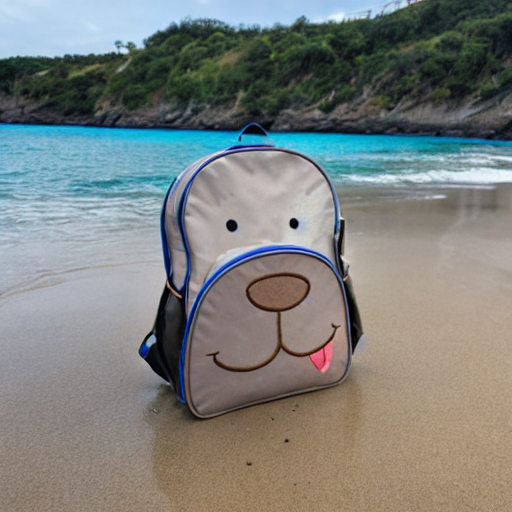

In [ ]:
images_1000[10]

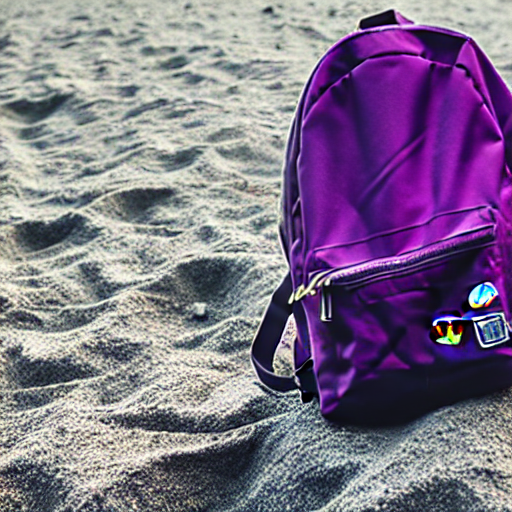

In [40]:
images_1000[6]

In [ ]:
print(images_1000.)

None
